In [1]:
# TensorFlow kütüphanesini içe aktardım
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# MNIST veri setini yükledim
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Verileri normalize ettik (0-1 aralığına çekmek modelin daha hızlı öğrenmesini sağlar)
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
# Etiketleri one-hot vektörüne çevirdik
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Modeli oluşturma (3 katmanlı basit bir MLP)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Input

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


In [11]:
# Modeli derlemesi
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Modeli eğitimi
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8793 - loss: 0.4349 - val_accuracy: 0.9609 - val_loss: 0.1366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9636 - loss: 0.1263 - val_accuracy: 0.9662 - val_loss: 0.1081
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9760 - loss: 0.0812 - val_accuracy: 0.9741 - val_loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9810 - loss: 0.0622 - val_accuracy: 0.9744 - val_loss: 0.0816
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9855 - loss: 0.0447 - val_accuracy: 0.9766 - val_loss: 0.0753


In [13]:
# Test verisi üzerinde doğruluğu değerlendirdik
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test doğruluk oranı:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9726 - loss: 0.0881
Test doğruluk oranı: 0.9765999913215637


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


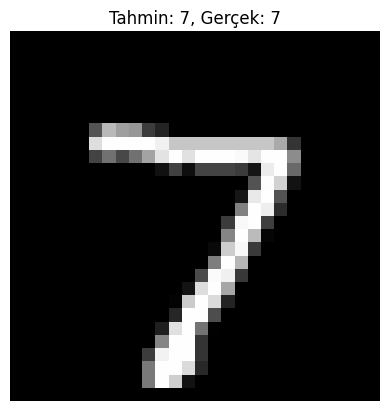

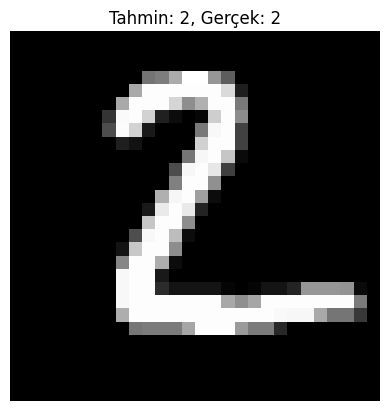

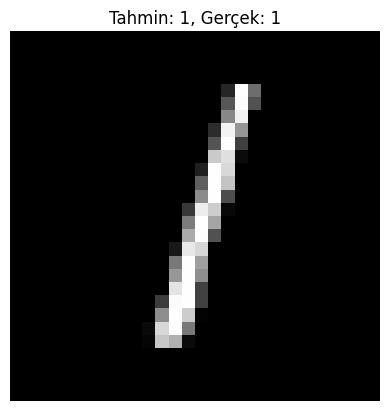

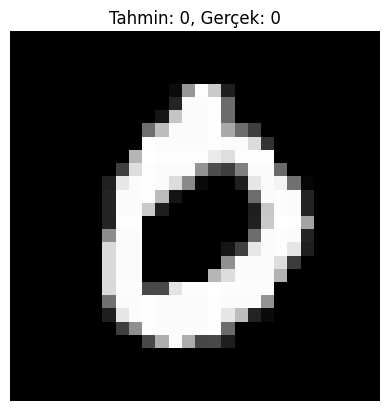

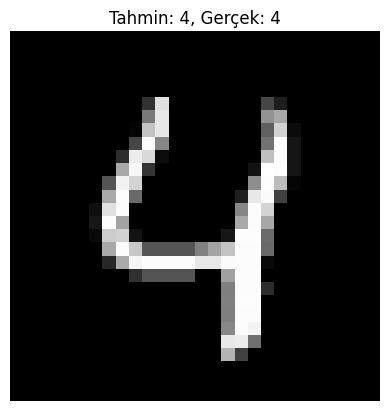

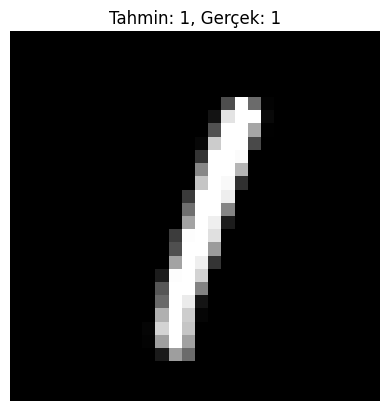

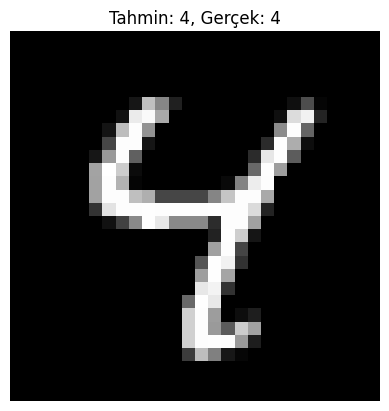

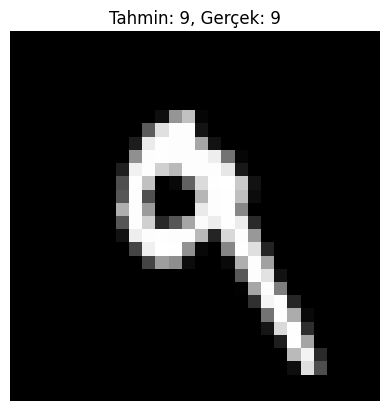

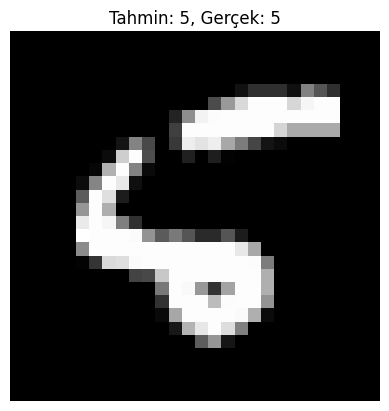

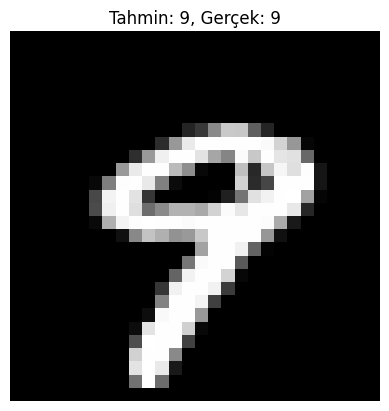

In [14]:
import matplotlib.pyplot as plt
import numpy as np

#ilk 10 tahmini görselleştirdik
predictions = model.predict(x_test)

for i in range(10):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Tahmin: {np.argmax(predictions[i])}, Gerçek: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()
